# 演習課題その3 リンク解析

## 必須課題(1) PageRankアルゴリズムの確認
講義資料「リンク解析（１）」p12のグラフに対して，遷移確率行列が確率行列の性質を満たすよう修正し， べき乗法に基づくPageRankの計算を適用し，結果を報告せよ．ただし，$d = 0.85$とする．また，さまざまな初期状態分布に対してPageRank値を求めることで，異なる初期状態分布に対して同じPageRank値が得られることを確認せよ．

In [2]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import warnings

In [3]:
# [START PageRankアルゴリズムの実装]
def pagerank(A, p, d = 0.85, eps = 1e-6):
    """PageRank値を返す関数
    
    params
    ---------
    A : 遷移確率行列
    p : 初期状態分布
    d : dumping factor
    eps : 許容する誤差
    """
    n = A.shape[0]
    e = np.ones(n)
    while True:
        # numpy はベクトルが標準で行ベクトルなので
        # 内積の計算順序を入れ替えている
        p_next = d * np.dot(p, A) + (1.0 - d) * e / n
        # L1ノルムがeps以内に収まれば終了
        if np.linalg.norm(p_next - p, ord=1) <= eps:
            p = p_next
            break
        p = p_next
    return p

In [4]:
# [START warningsを非表示に]
warnings.simplefilter('ignore')

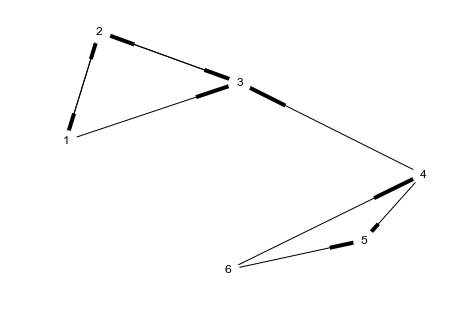

In [30]:
# [START 有向グラフの描画]
%matplotlib inline
%precision 2
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_edges_from([
        (1,2), (1,3), (2,1), (2,3), (3,2),
        (4,3), (4,5), (6,4), (6,5),
    ])
position = nx.spring_layout(G)
nx.draw(G, position, with_labels=True, node_size=500, node_color='w')
plt.show()

In [32]:
# 5番目のノードが出リンクを持たないことから，全てのノードにエッジを張る場合は以下
# G.add_edges_from([(5,1), (5,2), (5,3), (5,4), (5,5), (5,6)])
# 今回はグラフが見やすいように，表示するグラフそのものは5番目のノードからの
# 出リンクを省略したものを利用した．

In [33]:
# 行方向から列方向へのノードに有効エッジが存在するかを表現する行列を返す関数
edge_matrix = nx.to_numpy_matrix(G)
A = edge_matrix / edge_matrix.sum(axis=1)
# 今回はnan となるのは0による除算のみなので、
# nan を次元数^(-1)に置き換える
A[np.isnan(A)] = 1.0 / A.shape[0]
print(A)

[[ 0.    0.5   0.5   0.    0.    0.  ]
 [ 0.5   0.    0.5   0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.5   0.    0.5   0.  ]
 [ 0.17  0.17  0.17  0.17  0.17  0.17]
 [ 0.    0.    0.    0.5   0.5   0.  ]]


In [34]:
# [START 初期状態分布の指定とPageRank値を求める]
# 3つの初期状態分布を設定する
seed = np.abs(np.random.randn(6))
p1 = np.ones(6) / 6  # 全部の要素が1/6
p2 = np.asarray([1, 2, 3, 4, 5, 6]) / 21
p3 = seed / seed.sum()
plist = [p1, p2, p3]
for idx, p in enumerate(plist):
    score = pagerank(A, p)
    print("初期状態分布: {}".format(p))
    print("PageRank値: {}".format(score))

収束した
初期状態分布: [ 0.17  0.17  0.17  0.17  0.17  0.17]
PageRank値: [[ 0.19  0.36  0.29  0.05  0.07  0.04]]
収束した
初期状態分布: [ 0.05  0.1   0.14  0.19  0.24  0.29]
PageRank値: [[ 0.19  0.36  0.29  0.05  0.07  0.04]]
収束した
初期状態分布: [ 0.18  0.21  0.26  0.3   0.03  0.02]
PageRank値: [[ 0.19  0.36  0.29  0.05  0.07  0.04]]


### 結果
以上の出力から，今回のグラフに対しては異なる初期状態分布に対して同様のPageRank値が求められることが確かめられた．

## 必須課題(2) 定常分布
講義で述べたように，マルコフ連鎖が一意の定常分布 ${\mathbf \pi}$ を持つためには，そのマルコフ連鎖は既約かつ非周期的である必要がある．そこで，「既約ではあるが非周期的でないマルコフ連鎖」であるようなウェブグラフ$G$を用意し，$G$に対してテレポーテーションを用いない単純なPageRankアルゴリズム（すなわち，${\mathbf p} = A^{T}{\mathbf p}$）に基づくべき乗法を適用することで，初期状態分布によってはPageRankベクトルが収束しない場合があることを確認せよ．

- 用意したウェブグラフ$G$をNetworkXで可視化すること
- 用意したウェブグラフ$G$は，講義で使用した例とは異なる例を用いること

### 0. 有向グラフの描画
> 既約ではあるが，非周期的ではないマルコフ連鎖」

であるグラフ$G$を作成する．

既約であるとは，グラフ上の任意の頂点について，任意の2点の間に有向のパスが存在することであるので，
例えば6つの頂点からなるグラフを考えて， 1→2, 2→3, 3→4, 4→5, 5→6， 6→1, 5→2といった有向のエッジを持つようにすれば，
条件を満たすと言える．

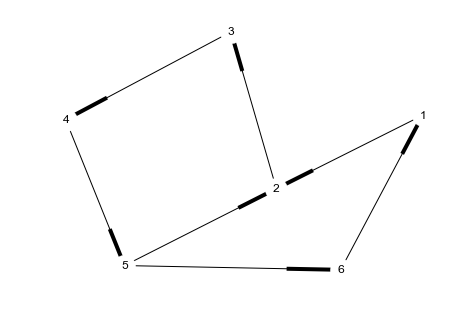

In [37]:
# [START 有向グラフの描画]
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6), (5,2),(6,1)])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="w")
plt.show()

In [38]:
# 行方向から列方向へのノードに有効エッジが存在するかを表現する行列を返す関数
# 必修課題(1) のコードをそのまま利用する
edge_matrix = nx.to_numpy_matrix(G)
A = edge_matrix / edge_matrix.sum(axis=1)
# 今回はnan となるのは0による除算のみなので、
# nan を次元数^(-1)に置き換える
A[np.isnan(A)] = 1.0 / A.shape[0]
print(A)

[[ 0.   1.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0. ]
 [ 0.   0.5  0.   0.   0.   0.5]
 [ 1.   0.   0.   0.   0.   0. ]]


### 1. PageRank関数の実装
必修課題(1)で実装したPageRank関数では，PageRank値が収束しない場合について
の処理が定義されていないため，pagerank関数の内容を変更する．

In [43]:
# [START PageRankアルゴリズムの実装]
import logging

MAX_ITER = 1000

def pagerank(A, p, d = 0.85, eps = 1e-6):
    """PageRank値を返す関数
    
    params
    ---------
    A : 遷移確率行列
    p : 初期状態分布
    d : dumping factor
    eps : 許容する誤差
    """
    n = A.shape[0]
    e = np.ones(n)
    num_iter = 0  # 追加 繰り返しの回数を表現する
    while True:
        # numpy はベクトルが標準で行ベクトルなので
        # 内積の計算順序を入れ替えている
        p_next = d * np.dot(p, A) + (1.0 - d) * e / n
        # L1ノルムがeps以内に収まれば終了
        if np.linalg.norm(p_next - p, ord=1) <= eps:
            print("収束した")
            p = p_next
            break
        if num_iter == MAX_ITER:
            print("収束しない")
            break;
        num_iter += 1
        p = p_next
    return p

### 2. 異なる初期状態分布でのPageRankを求める
次の`p1`, `p2`, `p3`といった，3つの異なる初期状態分布において，PageRank値が求められるかどうかを確認する．

In [44]:
p1 = p1  # 必修課題(1)と同じ
p2 = np.asarray([0, 0, 0, 0, 0.5, 0.5])
p3 = np.asarray([1, 0, 0, 0, 0, 0])

plist = [p1, p2, p3]
for idx, p in enumerate(plist):
    score = pagerank(A, p, d=1.0, eps=1e-6)
    print("初期状態分布: {}".format(p))
    print("PageRank値: {}".format(score))
    print("----" * 20)

収束した
初期状態分布: [ 0.17  0.17  0.17  0.17  0.17  0.17]
PageRank値: [[ 0.1  0.2  0.2  0.2  0.2  0.1]]
--------------------------------------------------------------------------------
収束した
初期状態分布: [ 0.   0.   0.   0.   0.5  0.5]
PageRank値: [[ 0.1  0.2  0.2  0.2  0.2  0.1]]
--------------------------------------------------------------------------------
収束しない
初期状態分布: [1 0 0 0 0 0]
PageRank値: [[ 0.2  0.   0.4  0.   0.4  0. ]]
--------------------------------------------------------------------------------


### 3. 結果
繰り返しの回数を1000回に設定したが， `p3`の初期状態分布においては，PageRankベクトルが収束しないことが確認された． 